# Insurance Claims- Fraud Detection

Description: Dataset conatins the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made, we have to build the model to predict the fraud cliams, dependent variables is Farud_report and independent variables are given below 

In [107]:
#importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [108]:
#loading the data set
df= pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [109]:
df.shape

(1000, 40)


Observation: Dataset contains the 1000 Rows and 40 columns

In [110]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Observation: Data set contains the integer, float and object data types

In [111]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Observation: Variables _c39 contains the all null values in dataset 

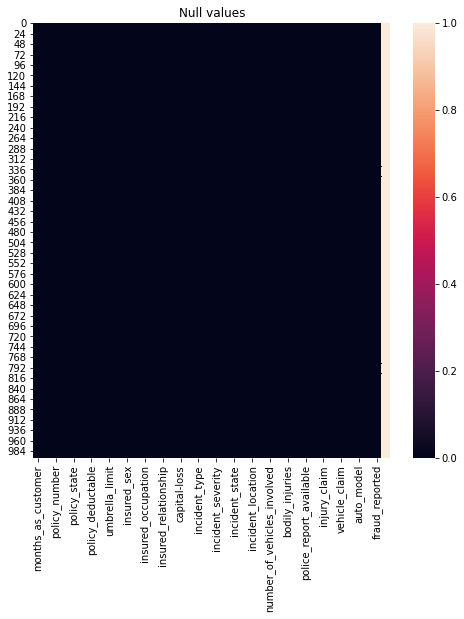

In [112]:

#Heat map to check the null values
plt.figure(figsize=[8,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observation: _c39 coulumn contains the all null values 

In [113]:
df['collision_type'].mode()

0    Rear Collision
dtype: object

In [114]:
#Replacing ? to none 
df['collision_type'] = df['collision_type'].str.replace('?','None')
df['police_report_available'] = df['police_report_available'].str.replace('?','None')
df['property_damage'] = df['property_damage'].str.replace('?','None')

In [115]:
#sperating day and month, year
df['Date']=df['incident_date'].str.split('-').str[0]
df['Month']=df['incident_date'].str.split('-').str[1]
df['Year']=df['incident_date'].str.split('-').str[2]

In [116]:
#converting object to intger type
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [117]:
#Dropping the column _c39 which contains the all null values

df.drop(['_c39','incident_date'], axis =1, inplace=True)

In [118]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

N    753
Y    247
Name: fraud_reported, dtype: int64


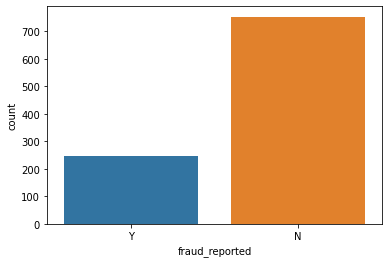

In [119]:
#univariate analysis
sns.countplot(df['fraud_reported'])
print(df['fraud_reported'].value_counts())
plt.show()

observation: Target variable contains the two class Y and N , Y class is less compare to N and data is imbalnaced 

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


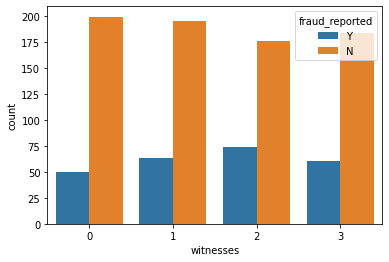

In [120]:
print(df['witnesses'].value_counts())
sns.countplot(x='witnesses', hue='fraud_reported', data=df)
plt.show()

Observation: 2 witness have highest number of insurances frauds 

None    360
NO      338
YES     302
Name: property_damage, dtype: int64


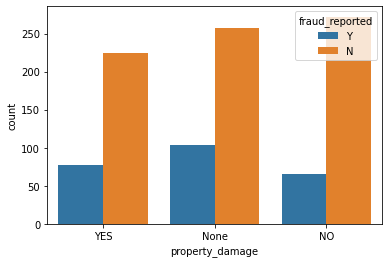

In [121]:
print(df['property_damage'].value_counts())
sns.countplot(x='property_damage', hue='fraud_reported', data=df)
plt.show()

Observation: Not sure about the damages that have numbers higest numbers insurance frauds 

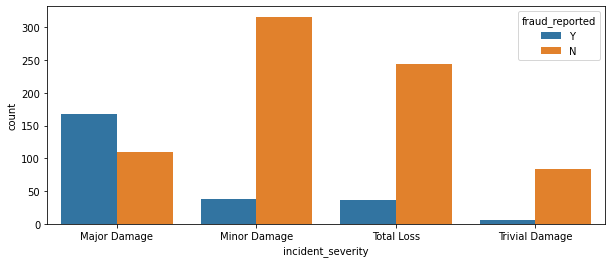

In [122]:
fig=plt.figure(figsize=(10,4))
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)
plt.show()

Observation: Highest fraud reported in Major damages in incident severity

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


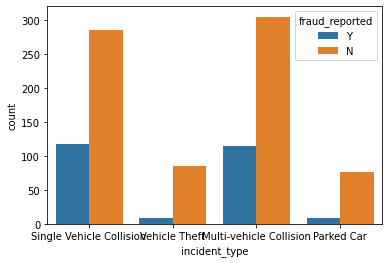

In [123]:
print(df['incident_type'].value_counts())
sns.countplot(x='incident_type', hue='fraud_reported', data=df)
plt.show()

Observaion: Single and multivehicle collison have highest number of incident types in dataset and almost equal insurance fraud reported

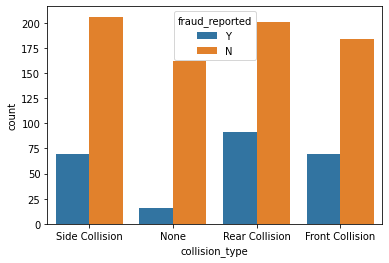

In [124]:
sns.countplot(x='collision_type', hue='fraud_reported', data=df)
plt.show()

Observation: Higest number of collision happend in rear collsion and higest number of fraud also reported in rear collision 

In [125]:
print(df['insured_hobbies'].value_counts())

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
movies            55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


Observaion: highest number People have hobbies off reading and second hobbie is excercise 

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


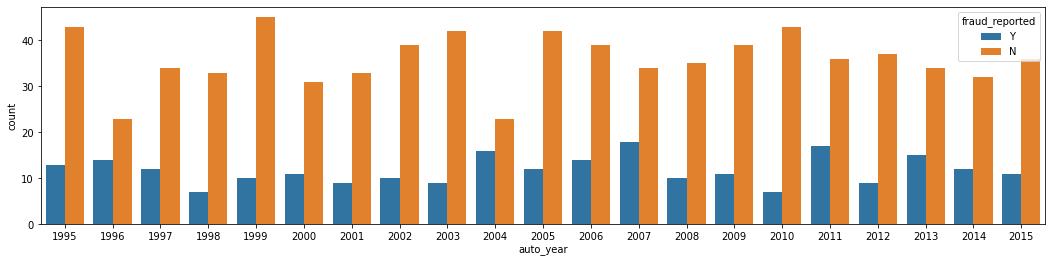

In [126]:
fig=plt.figure(figsize=(18,4))
print(df['auto_year'].value_counts())
sns.countplot(x='auto_year', hue='fraud_reported', data=df)
plt.show()




In [127]:
df['COUNTER'] =1       #initially, set that counter to 1.
Fraud_data = df.groupby(['fraud_reported','auto_year'])['COUNTER'].sum() #sum function
print(Fraud_data)


fraud_reported  auto_year
N               1995         43
                1996         23
                1997         34
                1998         33
                1999         45
                2000         31
                2001         33
                2002         39
                2003         42
                2004         23
                2005         42
                2006         39
                2007         34
                2008         35
                2009         39
                2010         43
                2011         36
                2012         37
                2013         34
                2014         32
                2015         36
Y               1995         13
                1996         14
                1997         12
                1998          7
                1999         10
                2000         11
                2001          9
                2002         10
                2003          9
              

Observation: We getting the highest number of the insurance claims fraud happened in the year of 2007

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


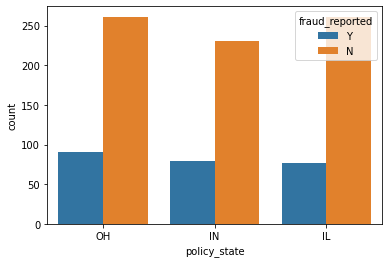

In [128]:
print(df['policy_state'].value_counts())
sns.countplot(x='policy_state', hue='fraud_reported', data=df)
plt.show()

Observation: dataset contains the three types Policy state  "IN", IL,OH and highest number fraud did is who took the OH policy

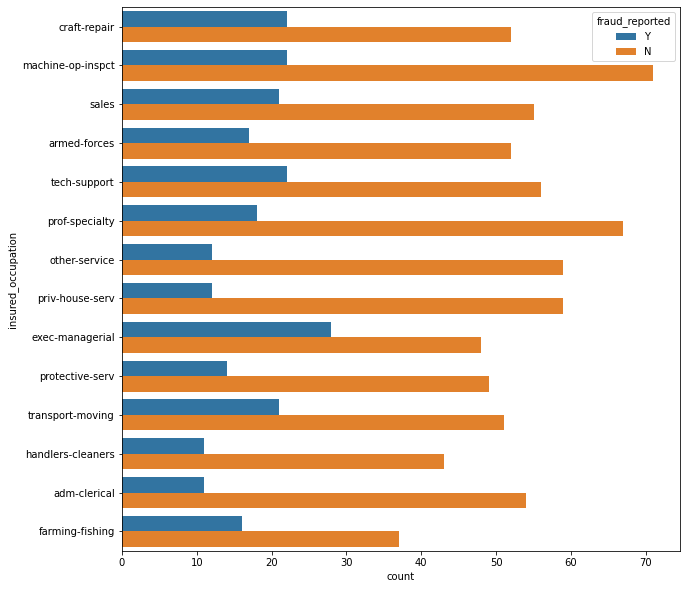

In [129]:
fig=plt.figure(figsize=(10,10))
sns.countplot(y ='insured_occupation', hue='fraud_reported',data =df)
plt.show()

Observation: Highest number of insurance fraud heppend whose occuption is Ex-Managerial

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


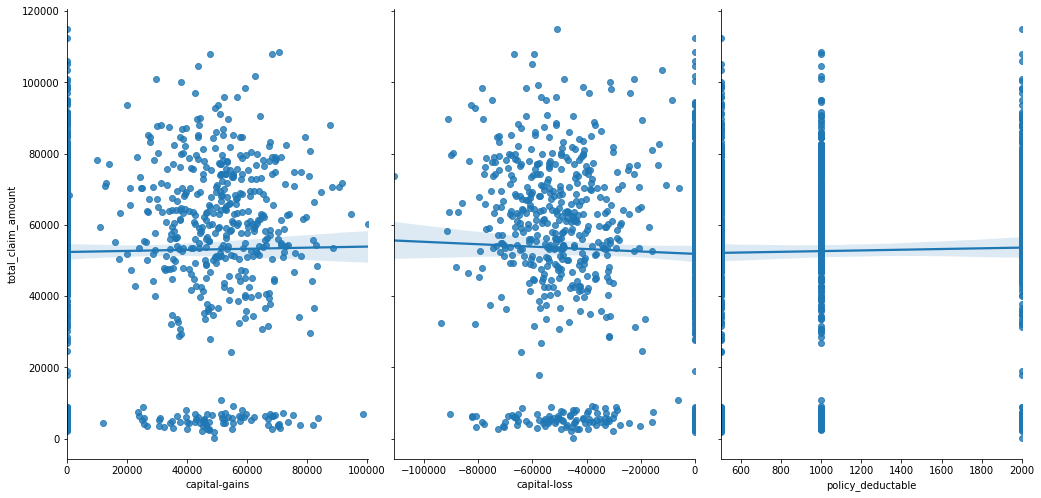

In [131]:
sns.pairplot(df, x_vars=['capital-gains','capital-loss','policy_deductable'], y_vars='total_claim_amount', size=7, aspect=0.7, kind='reg')

Observation: relationship between capital gains and total_claims_amount is nutral, capital loss and total claims amonut has slightly negative relation ship


In [132]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
Date                           0.039711
Month                          0.267378
Year                           0.000000
COUNTER                        0.000000
dtype: float64

Only 3 variables have skewness in the dataset need to treat

In [133]:
#Encoding the Cateogorical variables 
#label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()


df['fraud_reported'] = le.fit_transform(df['fraud_reported'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['police_report_available'] = le.fit_transform(df['incident_city'])



df['property_damage'] = le.fit_transform(df['property_damage'])
df['incident_location'] = le.fit_transform(df['incident_location'])
df['incident_city'] = le.fit_transform(df['incident_city'])

df['incident_state'] = le.fit_transform(df['incident_state'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])


df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['policy_csl'] = le.fit_transform(df['policy_csl'])
df['policy_state'] = le.fit_transform(df['policy_state'])

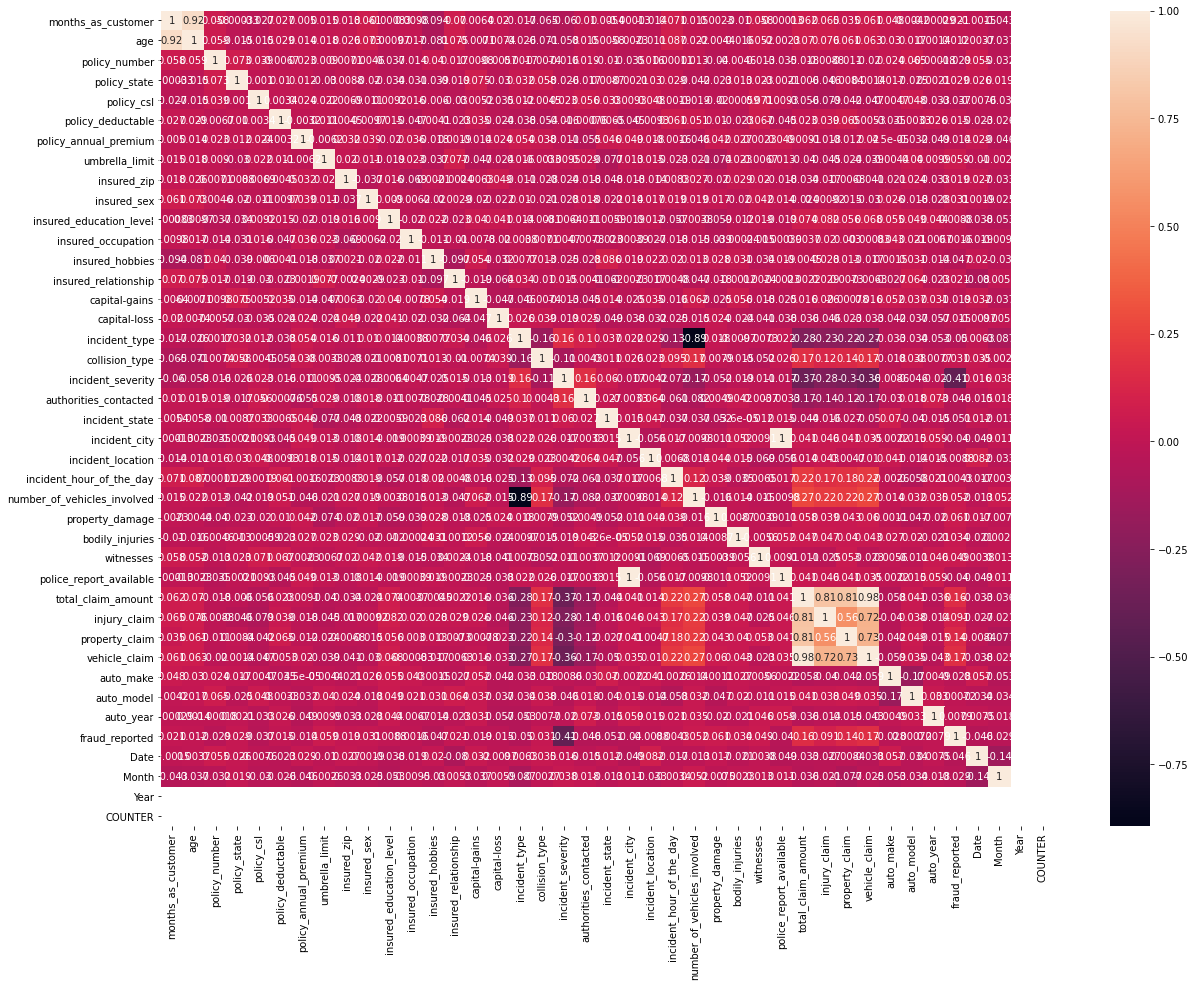

In [134]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_hmap, annot=True)
plt.show()


Observation: We can't understand the realtionship of the variables in this co-relation heat map

In [135]:
#to display the
corr_matrix=df.corr()
corr_matrix['fraud_reported'].sort_values(ascending = False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
property_damage                0.060616
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
collision_type                 0.031032
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


Observation: 
1. co-relation with dependent variable have highest positive relation with "vehicle_claim,total_claim_amount,property_claim " 

2. 5 independent variables have almost zero co-relation with the target variables 

3. 16 Variables have negative relation with dependent variables and Year variables not any relation 

In [136]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Date,Month,Year,COUNTER
0,328,48,521585,17-10-2014,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,3,0,4,4,1,996,5,1,2,1,2,1,71610,6510,13020,52080,10,1,2004,1,25,1,2015,1
1,228,42,342868,27-06-2006,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,628,8,1,1,0,0,5,5070,780,780,3510,8,12,2007,1,21,1,2015,1
2,134,29,687698,06-09-2000,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,2,1,4,1,1,685,7,3,0,2,3,1,34650,7700,3850,23100,4,30,2007,0,22,2,2015,1
3,256,41,227811,25-05-1990,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,669,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014,1,10,1,2015,1
4,228,44,367455,06-06-2014,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,17,2,2015,1


In [137]:
df.drop(['policy_bind_date'], axis =1, inplace =True)

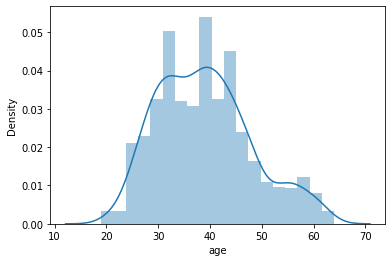

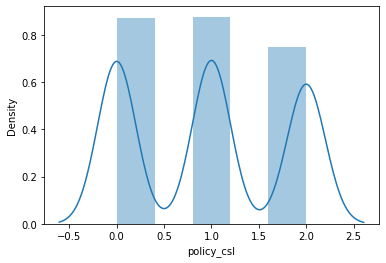

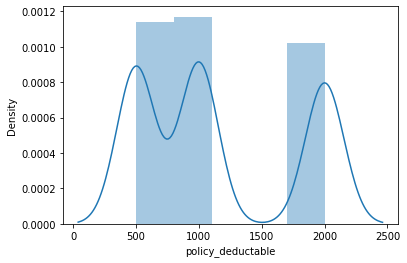

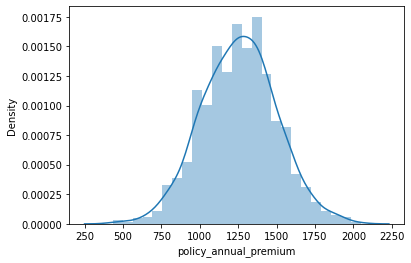

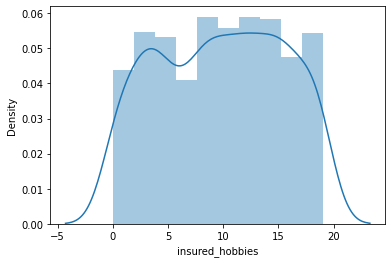

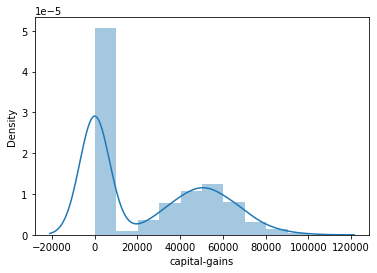

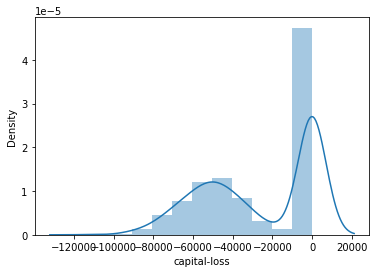

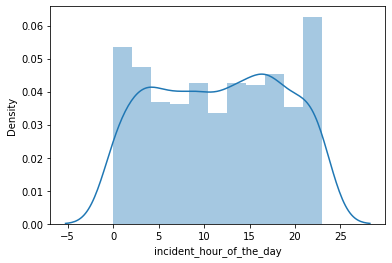

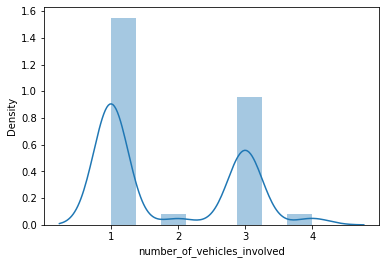

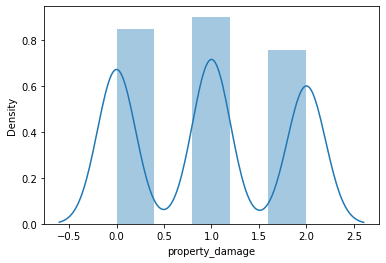

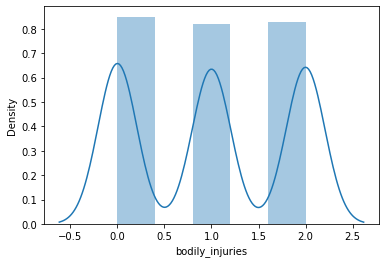

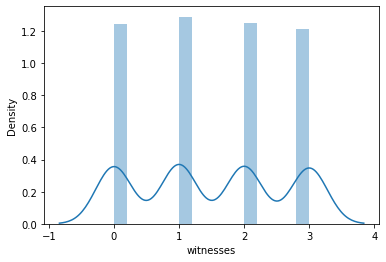

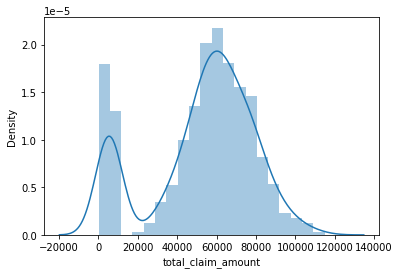

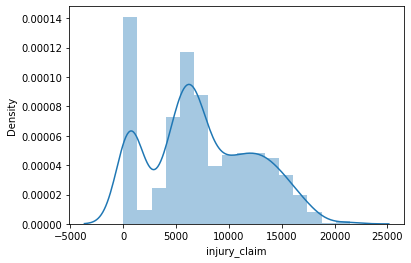

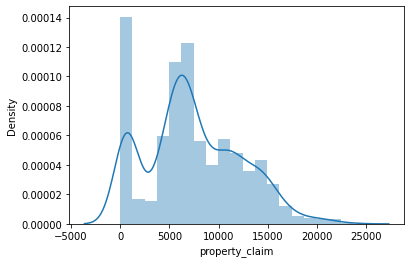

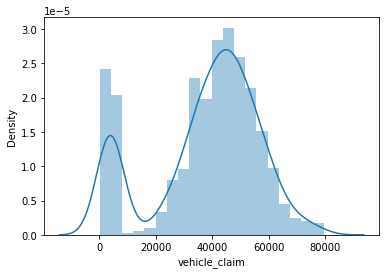

In [138]:
columns =['age','policy_csl', 'policy_deductable','policy_annual_premium','insured_hobbies','capital-gains', 'capital-loss',
       'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim']

for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])


Observation: 
1. We clearly see that most population of the people age is 40

2. Policy_CSL data is spreaded normly
3. highest policy amount deductable is the 1000
4. Ploicy anual premium data is distributed normally
5. Total claims amount -20000 to 120000 , Number people who claims zero insurance amount there population also high and who claimed the insurance amount aroung 60000 there population is high in dataset

6. most number people got zero amount for injury_claims

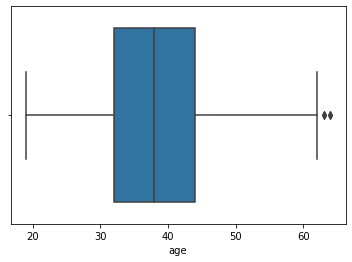

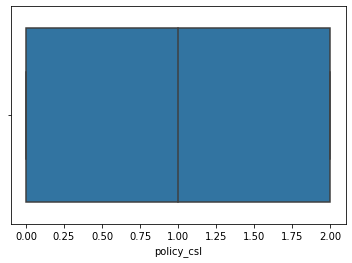

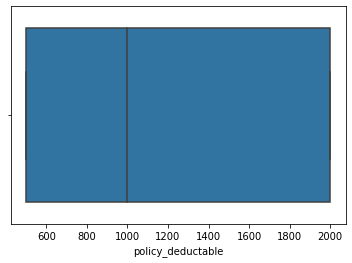

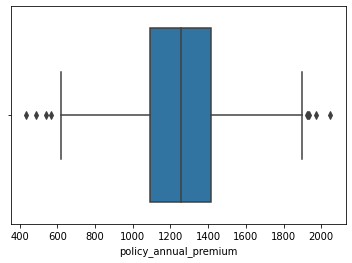

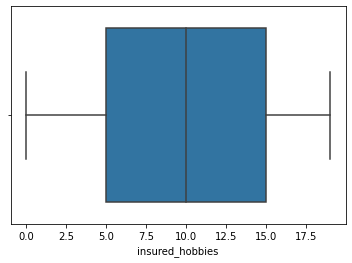

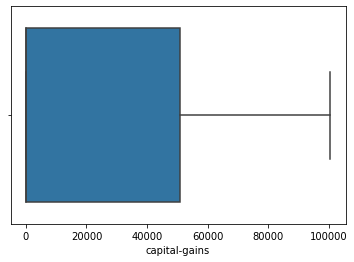

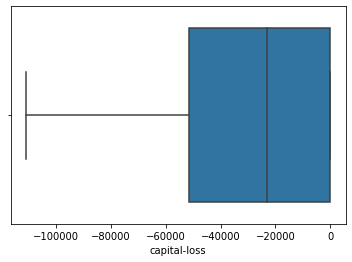

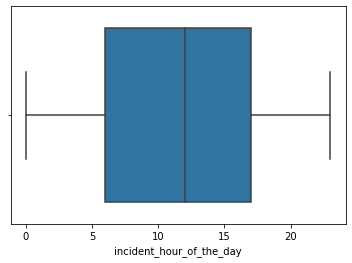

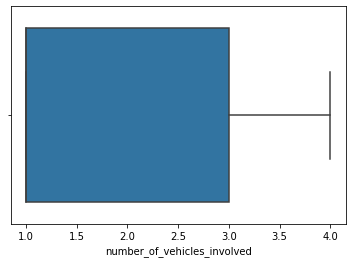

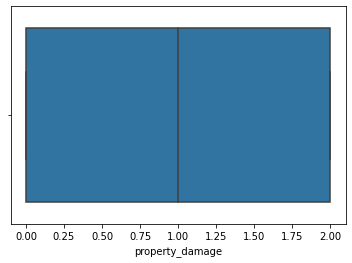

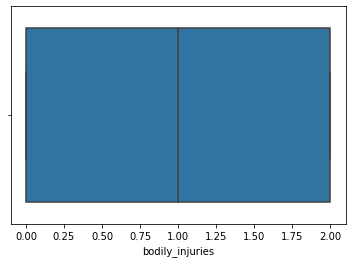

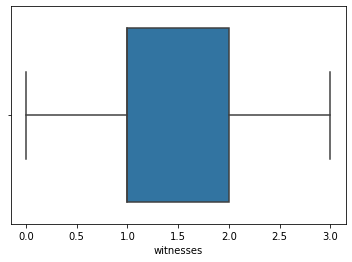

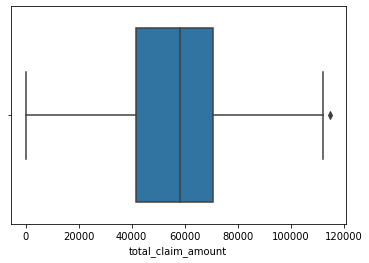

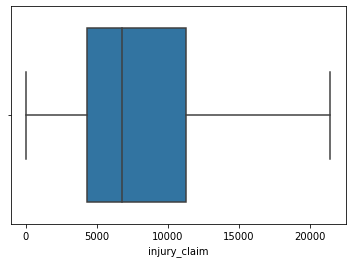

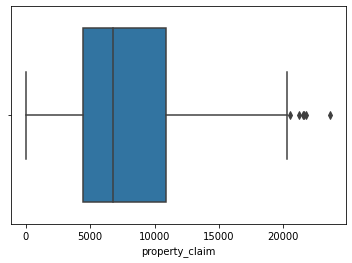

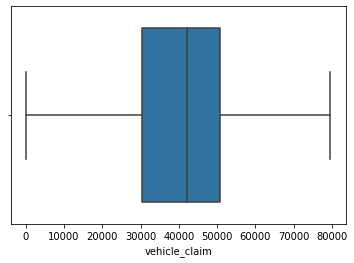

In [139]:
# with the help of box plot checking the outliers in data set 
for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

Observation : Propety claims and total claim amount, policy annual premuim have outliers in the data set 

In [140]:
#Spliting the data into Feature variables (X) and target variables (y)
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

In [141]:

# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

In [142]:
print(x.shape,y.shape )

(1000, 40) (1000,)


In [143]:
#import library
from collections import Counter
#import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
counter1 =Counter(y_train)
print('Before', counter1)

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

counter1 =Counter(y_smote)
print('after', counter1)

Before Counter({0: 578, 1: 172})
after Counter({1: 753, 0: 753})


### Model Buliding 

In [144]:
#importing the libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [145]:
LR=LogisticRegression() 
KNN=KNeighborsClassifier()
SVC=SVC()
DT=DecisionTreeClassifier(random_state=8)
GNB=GaussianNB()

In [146]:
All_models= []
Model = []
F1_score=[]
Accuracy_score=[]
Precision_score=[]
CVS = []
rocscore = []

All_models.append(('LogisticRegression', LR))
All_models.append(('KNeighborsClassifier', KNN))
All_models.append(('SVC', SVC))
All_models.append(('DecisionTreeClassifier', DT))
All_models.append(('GaussianNB', GNB))

In [147]:
for name, model in All_models:
    Model.append(name)
    ml=model
    ml.fit(x_train,y_train) #unbalanced data
    #ml.fit(x_smote, y_smote) #balanced data
    pred=ml.predict(x_test)
    F1_score.append(f1_score(y_test,pred))
    Accuracy_score.append(accuracy_score(y_test,pred)*100)
    Precision_score.append(precision_score(y_test,pred)*100)
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    CVS.append(sc*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    rocscore.append(roc_auc*100)

In [148]:
AccuracyTable=pd.DataFrame({'Model':Model,
                        'F1_score':F1_score,
                        'Accuracy_score': Accuracy_score, 
                        'Precision Score': Precision_score,
                        'Cross_Val_Score': CVS,
                        'ROC_Score':rocscore
                       })
AccuracyTable

,Model,F1_score,Accuracy_score,Precision Score,Cross_Val_Score,ROC_Score
0,LogisticRegression,0.000000,70.0,0.000000,75.3,50.000000
1,KNeighborsClassifier,0.147368,67.6,35.000000,70.3,50.952381
2,SVC,0.000000,70.0,0.000000,75.3,50.000000
3,DecisionTreeClassifier,0.594595,76.0,60.273973,77.4,71.047619
4,GaussianNB,0.256881,67.6,41.176471,67.6,53.619048


### Saving the Model¶
We Getting the highest accuracy in  DecisionTree classification model so we are saving this model 



In [150]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(DT, 'DT.pkl')
  
# Load the model from the file
DT_joblib = joblib.load('DT.pkl') 
  
# Use the loaded model to make predictions
#DT_joblib.predict(x_test)